In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import polyfit, poly1d, linspace
%matplotlib inline
sns.set_style('whitegrid')

In [24]:
df = pd.read_csv("/Users/unun/Desktop/Sony Project/UK revenue 2015-2020.csv")

In [168]:
df.dropna(inplace=True)
df

,2016,2017,2018,2019,2020,Predicted 2021
Company,,,,,,
Sony,139336000,151954000,165459000,172856000,181290000,193653978
Universal,238988000,242102000,268355000,280007000,301591000,319834843
Warner,140960000,177358000,197373000,176068000,135017000,136028547
Kobalt,33395000,45894000,52587000,65437000,75247000,92448163
Beggars UK,12134385,9500669,9888950,9890777,10185737,9813550
Industry Total,759000000,839500000,997000000,1077000000,1118000000,1233148410
Domino,3306390,2999670,6301950,4028000,4221000,4989365
Ninja Tune,0,2546200,3140160,4015130,4358400,5226157
AWAL,3187000,10657000,12533000,29127000,30687000,62470937


In [26]:
df.rename(columns={ df.columns[0]: "Companies" }, inplace = True)

In [27]:
df.set_index('Companies', inplace=True)

In [33]:
df.drop('Total Industry', axis=0, inplace=True)

In [34]:
df.drop('Beggars Sales', axis=0, inplace=True)
df.drop('Beggars Mg', axis=0, inplace=True)
df.drop('AMRA', axis=0, inplace=True)
df.drop('NB Rights', axis=0, inplace=True)
df.drop('AWAL', axis=0, inplace=True)
df.drop('Kobalt Publishing', axis=0, inplace=True)
df.drop('BMG Rights Management', axis=0, inplace=True)

In [28]:
df['Company'] = ['Sony', 'Universal', 'Warner', 'Kobalt', 'Kobalt Publishing', 'AWAL', 'NB Rights', 'AMRA', 'BMG Rights Management', 
'Beggars UK', 'Beggars Sales', 'Beggars Mg', 'Total Industry']

In [29]:
df.set_index('Company', inplace=True)

In [ ]:
#adjust dtypes

In [75]:
df.shape

(11, 6)

In [172]:
df.dtypes

2016              int64
2017              int64
2018              int64
2019              int64
2020              int64
Predicted 2021    int64
dtype: object

In [35]:
df['2015'] = df['2015'].str.replace(',','')
df['2016'] = df['2016'].str.replace(',','')
df['2017'] = df['2017'].str.replace(',','')
df['2018'] = df['2018'].str.replace(',','')
df['2019'] = df['2019'].str.replace(',','')
df['2020'] = df['2020'].str.replace(',','')

In [36]:
df['2015'] = pd.to_numeric(df['2015'])
df['2016'] = pd.to_numeric(df['2016'])
df['2017'] = pd.to_numeric(df['2017'])
df['2018'] = pd.to_numeric(df['2018'])
df['2019'] = pd.to_numeric(df['2019'])
df['2020'] = pd.to_numeric(df['2020'])

In [ ]:
#combine Kobalt as one and add in data for Beggars, Domino, and Ninja Tune

In [39]:
df.loc['Industry Total'] = {'2015':990000000, '2016':759000000, '2017':839500000, '2018':997000000, '2019':1077000000, '2020':1118000000}

In [40]:
df.loc['Domino'] = {'2015':3094670, '2016':3306390, '2017':2999670, '2018':6301950, '2019':4028000, '2020':4221000}
df.loc['Ninja Tune'] = {'2015':0, '2016':0, '2017':2546200, '2018':3140160, '2019':4015130, '2020':4358400}

In [50]:
df.loc['Other Firms'] = {'2015':0, '2016':157379225, '2017':137586461, '2018':206466940, '2019':298431093, '2020':359551863}

In [42]:
df.loc['AWAL'] = {'2015':0, '2016':3187000, '2017':10657000, '2018':12533000, '2019':29127000, '2020':30687000}

In [43]:
df.loc['BMG'] = {'2015':17414000, '2016':33501000, '2017':69559000, '2018':87428000, '2019':66267000, '2020':46538000}

In [ ]:
#HHI Calculation

In [45]:
(df.loc['Industry Total'][-1]) - ((df['2020'][0])+(df['2020'][3])+(df['2020'][2])+(df['2020'][1])+(df['2020'][4])+(df['2020'][-1])+(df['2020'][-3])+(df['2020'][-4]))

359551863

In [46]:
(df.loc['Industry Total'][-2]) - ((df['2019'][0])+(df['2019'][3])+(df['2019'][2])+(df['2019'][1])+(df['2019'][4])+(df['2019'][-3])+(df['2019'][-1])+(df['2019'][-4]))

298431093

In [47]:
(df.loc['Industry Total'][-3]) - ((df['2018'][0])+(df['2018'][3])+(df['2018'][2])+(df['2018'][1])+(df['2018'][4])+(df['2018'][-3])+(df['2018'][-1])+(df['2018'][-4]))

206466940

In [48]:
(df.loc['Industry Total'][-4]) - ((df['2017'][0])+(df['2017'][3])+(df['2017'][2])+(df['2017'][1])+(df['2017'][4])+(df['2017'][-3])+(df['2017'][-1])+(df['2017'][-4]))

137586461

In [49]:
(df.loc['Industry Total'][-5]) - ((df['2016'][0])+(df['2016'][3])+(df['2016'][2])+(df['2016'][1])+(df['2016'][4])+(df['2016'][-3])+(df['2016'][-1])+(df['2016'][-4]))

157379225

In [ ]:
#Calculate HHI includes
#Revenue for each companies.  
#Number of firms: 7 firms (Sony, Kobalt (add all4 subsidiaries), Warner, UMG, Beggars, Domino, Ninja) 
#Number of years: 5 years (2015-2020)

In [ ]:
#before merger

In [194]:
df

,2016,2017,2018,2019,2020
Company,,,,,
Sony,1.393360e+08,1.519540e+08,1.654590e+08,1.728560e+08,1.812900e+08
Universal,2.389880e+08,2.421020e+08,2.683550e+08,2.800070e+08,3.015910e+08
Warner,1.409600e+08,1.773580e+08,1.973730e+08,1.760680e+08,1.350170e+08
Kobalt,3.339500e+07,4.589400e+07,5.258700e+07,6.543700e+07,7.524700e+07
Beggars UK,1.213438e+07,9.500669e+06,9.888950e+06,9.890777e+06,1.018574e+07
Industry Total,7.590000e+08,8.395000e+08,9.970000e+08,1.077000e+09,1.118000e+09
Domino,3.306390e+06,2.999670e+06,6.301950e+06,4.028000e+06,4.221000e+06
Ninja Tune,0.000000e+00,2.546200e+06,3.140160e+06,4.015130e+06,4.358400e+06
Other Firms,1.908802e+08,2.071455e+08,2.938949e+08,3.646981e+08,4.060899e+08


In [58]:
Sony_msb = (((df['2020'][0])/(df.loc['Industry Total'][-1])*100)**2)
Kobalt_msb = (((df['2020'][3])/(df.loc['Industry Total'][-1])*100)**2)
Warner_msb = (((df['2020'][2])/(df.loc['Industry Total'][-1])*100)**2)
universal_msb = (((df['2020'][1])/(df.loc['Industry Total'][-1])*100)**2)
Beggars_msb = (((df['2020'][4])/(df.loc['Industry Total'][-1])*100)**2)
Domino_msb = (((df['2020'][-5])/(df.loc['Industry Total'][-1])*100)**2)
Ninja_msb = (((df['2020'][-4])/(df.loc['Industry Total'][-1])*100)**2)
BMG_msb = (((df['2020'][-2])/(df.loc['Industry Total'][-1])*100)**2)
Other_msb = (((df['2020'][-1])/(df.loc['Industry Total'][-1])*100)**2)

print(f"Sony_msb = {Sony_msb} \nKobalt_msb = {Kobalt_msb} \nWarner_msb = {Warner_msb} \nuniversal_msb = {universal_msb} \nBeggars_msb = {Beggars_msb} \nDomino_msb = {Domino_msb} \nNinja_msb = {Ninja_msb} \nBMG_msb = {BMG_msb} \nOther_msb = {Other_msb}")

Sony_msb = 262.9444998255894 
Kobalt_msb = 45.299642290251256 
Warner_msb = 145.84558972385526 
universal_msb = 727.7012944867046 
Beggars_msb = 0.830044372563204 
Domino_msb = 0.142543394638394 
Ninja_msb = 0.15197444452622721 
BMG_msb = 17.32733705409289 
Other_msb = 1034.2832219140587


In [59]:
HHI_2020 = Sony_msb + Kobalt_msb + Warner_msb + universal_msb + Beggars_msb + Domino_msb + Ninja_msb + BMG_msb + Other_msb
print(f"HHI 2020 = {HHI_2020}")

HHI 2020 = 2234.52614750628


In [60]:
Sony_msb1 = (((df['2019'][0])/(df.loc['Industry Total'][-2])*100)**2)
Kobalt_msb1 = (((df['2019'][3])/(df.loc['Industry Total'][-2])*100)**2)
Warner_msb1 = (((df['2019'][2])/(df.loc['Industry Total'][-2])*100)**2)
universal_msb1 = (((df['2019'][1])/(df.loc['Industry Total'][-2])*100)**2)
Beggars_msb1 = (((df['2019'][4])/(df.loc['Industry Total'][-2])*100)**2)
Domino_msb1 = (((df['2019'][-5])/(df.loc['Industry Total'][-2])*100)**2)
Ninja_msb1 = (((df['2019'][-4])/(df.loc['Industry Total'][-2])*100)**2)
BMG_msb1 = (((df['2019'][-2])/(df.loc['Industry Total'][-2])*100)**2)
Other_msb1 = (((df['2019'][-1])/(df.loc['Industry Total'][-2])*100)**2)

print(f"Sony_msb = {Sony_msb1} \nKobalt_msb = {Kobalt_msb1} \nWarner_msb = {Warner_msb1} \nuniversal_msb = {universal_msb1} \nBeggars_msb = {Beggars_msb1} \nDomino_msb = {Domino_msb1} \nNinja_msb = {Ninja_msb1} \nBMG_msb = {BMG_msb1} \nOther_msb = {Other_msb1}")

Sony_msb = 257.59504880040066 
Kobalt_msb = 36.916060974421704 
Warner_msb = 267.2572254336256 
universal_msb = 675.9372345117675 
Beggars_msb = 0.8433918771211771 
Domino_msb = 0.1398773890470882 
Ninja_msb = 0.13898496301842617 
BMG_msb = 37.858483484765024 
Other_msb = 767.8152479089207


In [61]:
HHI_2019 = Sony_msb1 + Kobalt_msb1 + Warner_msb1 + universal_msb1 + Beggars_msb1 + Domino_msb1 + Ninja_msb1 + BMG_msb1 + Other_msb1
print(f"HHI 2019 = {HHI_2019}")

HHI 2019 = 2044.5015553430876


In [62]:
Sony_msb2 = (((df['2018'][0])/(df.loc['Industry Total'][-3])*100)**2)
Kobalt_msb2 = (((df['2018'][3])/(df.loc['Industry Total'][-3])*100)**2)
Warner_msb2 = (((df['2018'][2])/(df.loc['Industry Total'][-3])*100)**2)
universal_msb2 = (((df['2018'][1])/(df.loc['Industry Total'][-3])*100)**2)
Beggars_msb2 = (((df['2018'][4])/(df.loc['Industry Total'][-3])*100)**2)
Domino_msb2 = (((df['2018'][-5])/(df.loc['Industry Total'][-3])*100)**2)
Ninja_msb2 = (((df['2018'][-4])/(df.loc['Industry Total'][-3])*100)**2)
BMG_msb2 = (((df['2018'][-2])/(df.loc['Industry Total'][-3])*100)**2)
Other_msb2 = (((df['2018'][-1])/(df.loc['Industry Total'][-3])*100)**2)

print(f"Sony_msb = {Sony_msb2} \nKobalt_msb = {Kobalt_msb2} \nWarner_msb = {Warner_msb2} \nuniversal_msb = {universal_msb2} \nBeggars_msb = {Beggars_msb2} \nDomino_msb = {Domino_msb2} \nNinja_msb = {Ninja_msb2} \nBMG_msb = {BMG_msb2} \nOther_msb = {Other_msb2}")

Sony_msb = 275.4168290327351 
Kobalt_msb = 27.820598897997908 
Warner_msb = 391.90893773597617 
universal_msb = 724.4844465693972 
Beggars_msb = 0.983807310622942 
Domino_msb = 0.39953937844124143 
Ninja_msb = 0.09920035759837183 
BMG_msb = 76.89724322415591 
Other_msb = 428.855244901843


In [63]:
HHI_2018 = Sony_msb2 + Kobalt_msb2 + Warner_msb2 + universal_msb2 + Beggars_msb2 + Domino_msb2 + Ninja_msb2 + BMG_msb2 + Other_msb2
print(f"HHI 2018 = {HHI_2018}")

HHI 2018 = 1926.865847408768


In [64]:
Sony_msb3 = (((df['2017'][0])/(df.loc['Industry Total'][-4])*100)**2)
Kobalt_msb3 = (((df['2017'][3])/(df.loc['Industry Total'][-4])*100)**2)
Warner_msb3 = (((df['2017'][2])/(df.loc['Industry Total'][-4])*100)**2)
universal_msb3 = (((df['2017'][1])/(df.loc['Industry Total'][-4])*100)**2)
Beggars_msb3 = (((df['2017'][4])/(df.loc['Industry Total'][-4])*100)**2)
Domino_msb3 = (((df['2017'][-5])/(df.loc['Industry Total'][-4])*100)**2)
Ninja_msb3 = (((df['2017'][-4])/(df.loc['Industry Total'][-4])*100)**2)
BMG_msb3 = (((df['2017'][-2])/(df.loc['Industry Total'][-4])*100)**2)
Other_msb3 = (((df['2017'][-1])/(df.loc['Industry Total'][-4])*100)**2)

print(f"Sony_msb = {Sony_msb3} \nKobalt_msb = {Kobalt_msb3} \nWarner_msb = {Warner_msb3} \nuniversal_msb = {universal_msb3} \nBeggars_msb = {Beggars_msb3} \nDomino_msb = {Domino_msb3} \nNinja_msb = {Ninja_msb3} \nBMG_msb = {BMG_msb3} \nOther_msb = {Other_msb3}")

Sony_msb = 327.6294046947171 
Kobalt_msb = 29.886180953026223 
Warner_msb = 446.33419895631187 
universal_msb = 831.6782679499871 
Beggars_msb = 1.2807576966430927 
Domino_msb = 0.1276749094305475 
Ninja_msb = 0.09199063709963778 
BMG_msb = 68.65390721170782 
Other_msb = 268.60246800957515


In [65]:
HHI_2017 = Sony_msb3 + Kobalt_msb3 + Warner_msb3 + universal_msb3 + Beggars_msb3 + Domino_msb3 + Ninja_msb3 + BMG_msb3 + Other_msb3
print(f"HHI 2017 = {HHI_2017}")

HHI 2017 = 1974.2848510184988


In [66]:
Sony_msb4 = (((df['2016'][0])/(df.loc['Industry Total'][-5])*100)**2)
Kobalt_msb4 = (((df['2016'][3])/(df.loc['Industry Total'][-5])*100)**2)
Warner_msb4 = (((df['2016'][2])/(df.loc['Industry Total'][-5])*100)**2)
universal_msb4 = (((df['2016'][1])/(df.loc['Industry Total'][-5])*100)**2)
Beggars_msb4 = (((df['2016'][4])/(df.loc['Industry Total'][-5])*100)**2)
Domino_msb4 = (((df['2016'][-5])/(df.loc['Industry Total'][-5])*100)**2)
Ninja_msb4 = (((df['2016'][-4])/(df.loc['Industry Total'][-5])*100)**2)
BMG_msb4 = (((df['2016'][-2])/(df.loc['Industry Total'][-5])*100)**2)
Other_msb4 = (((df['2016'][-1])/(df.loc['Industry Total'][-5])*100)**2)

print(f"Sony_msb = {Sony_msb4} \nKobalt_msb = {Kobalt_msb4} \nWarner_msb = {Warner_msb4} \nuniversal_msb = {universal_msb4} \nBeggars_msb = {Beggars_msb4} \nDomino_msb = {Domino_msb4} \nNinja_msb = {Ninja_msb4} \nBMG_msb = {BMG_msb4} \nOther_msb = {Other_msb4}")

Sony_msb = 337.01026237629776 
Kobalt_msb = 19.35884059706881 
Warner_msb = 344.91194120271285 
universal_msb = 991.4450249878055 
Beggars_msb = 2.5559478498375228 
Domino_msb = 0.18976871016575794 
Ninja_msb = 0.0 
BMG_msb = 19.481930509772063 
Other_msb = 429.94336667240583


In [67]:
HHI_2016 = Sony_msb4 + Kobalt_msb4 + Warner_msb4 + universal_msb4 + Beggars_msb4 + Domino_msb4 + Ninja_msb4 + BMG_msb4 + Other_msb4
print(f"HHI 2016 = {HHI_2016}")

HHI 2016 = 2144.8970829060663


In [175]:
HHI_index = {'Year': ['2016', '2017', '2018', '2019', '2020', '2021']}
HHI_df = pd.DataFrame(HHI_index)

In [176]:
HHI_df['Value'] = [HHI_2016, HHI_2017, HHI_2018, HHI_2019, HHI_2020, HHI_2021]

In [177]:
HHI_df.set_index('Year', inplace=True)

In [178]:
HHI_df

,Value
Year,
2016,2144.897083
2017,1974.284851
2018,1926.865847
2019,2044.501555
2020,2234.526148
2021,2122.450232


In [72]:
ms_value = {'Year': ['2016', '2017', '2018', '2019', '2020', '2021'], 'Sony': [np.sqrt(Sony_msb4), np.sqrt(Sony_msb3), np.sqrt(Sony_msb2), np.sqrt(Sony_msb1), np.sqrt(Sony_msb)], 'Warner': [np.sqrt(Warner_msb4), np.sqrt(Warner_msb3), np.sqrt(Warner_msb2), np.sqrt(Warner_msb1), np.sqrt(Warner_msb)], 'Universal': [np.sqrt(universal_msb4), np.sqrt(universal_msb3), np.sqrt(universal_msb2), np.sqrt(universal_msb1), np.sqrt(universal_msb)], 'Beggars': [np.sqrt(Beggars_msb4), np.sqrt(Beggars_msb3), np.sqrt(Beggars_msb2), np.sqrt(Beggars_msb1), np.sqrt(Beggars_msb)],'BMG': [np.sqrt(BMG_msb4), np.sqrt(BMG_msb3), np.sqrt(BMG_msb2), np.sqrt(BMG_msb1), np.sqrt(BMG_msb)], 'Other': [np.sqrt(Other_msb4), np.sqrt(Other_msb3), np.sqrt(Other_msb2), np.sqrt(Other_msb1), np.sqrt(Other_msb)]}

In [73]:
ms_df = pd.DataFrame(ms_value)

In [74]:
ms_df

,Year,Sony,Warner,Universal,Beggars,BMG,Other
0,2016,18.357839,18.571805,31.487220,1.598733,4.413834,20.735076
1,2017,18.100536,21.126623,28.838833,1.131706,8.285765,16.389096
2,2018,16.595687,19.796690,26.916249,0.991871,8.769107,20.708820
3,2019,16.049768,16.348004,25.998793,0.918364,6.152925,27.709479
4,2020,16.215564,12.076655,26.975939,0.911068,4.162612,32.160274


In [219]:
df.loc['Sony MS'] = {'2016':np.sqrt(Sony_msb4), '2017':np.sqrt(Sony_msb3), '2018':np.sqrt(Sony_msb2), '2019':np.sqrt(Sony_msb1), '2020':np.sqrt(Sony_msb)}

In [220]:
#Stops at Beggars cuz Domino has 58.56% lower revenue than Beggars
#what they do doesnt have effect on market or the big3
(df.loc['Beggars UK'][-1] - df.loc['Domino'][-1])/ df.loc['Beggars UK'][-1]

0.5855969970557849

In [ ]:
#post merger

In [173]:
Sony_msb5 = ((((df['Predicted 2021'][0]) + (df['Predicted 2021'][-3]))/(df.loc['Industry Total'][-1])*100)**2)
Kobalt_msb5 = (((df['Predicted 2021'][3])/(df.loc['Industry Total'][-1])*100)**2)
Warner_msb5 = (((df['Predicted 2021'][2])/(df.loc['Industry Total'][-1])*100)**2)
universal_msb5 = (((df['Predicted 2021'][1])/(df.loc['Industry Total'][-1])*100)**2)
Beggars_msb5 = (((df['Predicted 2021'][4])/(df.loc['Industry Total'][-1])*100)**2)
Domino_msb5 = (((df['Predicted 2021'][-5])/(df.loc['Industry Total'][-1])*100)**2)
Ninja_msb5 = (((df['Predicted 2021'][-4])/(df.loc['Industry Total'][-1])*100)**2)
BMG_msb5 = (((df['Predicted 2021'][-2])/(df.loc['Industry Total'][-1])*100)**2)
Other_msb5 = (((df['Predicted 2021'][-1])/(df.loc['Industry Total'][-1])*100)**2)

print(f"Sony_msb = {Sony_msb5} \nKobalt_msb = {Kobalt_msb5} \nWarner_msb = {Warner_msb5} \nuniversal_msb = {universal_msb5} \nBeggars_msb = {Beggars_msb5} \nDomino_msb = {Domino_msb5} \nNinja_msb = {Ninja_msb5} \nBMG_msb = {BMG_msb5} \nOther_msb = {Other_msb5}")

Sony_msb = 431.3928671324417 
Kobalt_msb = 56.20382556183674 
Warner_msb = 121.68286419813955 
universal_msb = 672.6991113948349 
Beggars_msb = 0.6333176396602227 
Domino_msb = 0.1637042135491249 
Ninja_msb = 0.17961152903947086 
BMG_msb = 20.453109054206816 
Other_msb = 819.0418210262047


In [174]:
HHI_2021 = Sony_msb5 + Kobalt_msb5 + Warner_msb5 + universal_msb5 + Beggars_msb5 + Domino_msb5 + Ninja_msb5 + BMG_msb5 + Other_msb5
print(f"HHI 2021 = {HHI_2021}")

HHI 2021 = 2122.450231749913


In [ ]:
#plot

Text(0.5, 1.0, 'Sony Market Share')

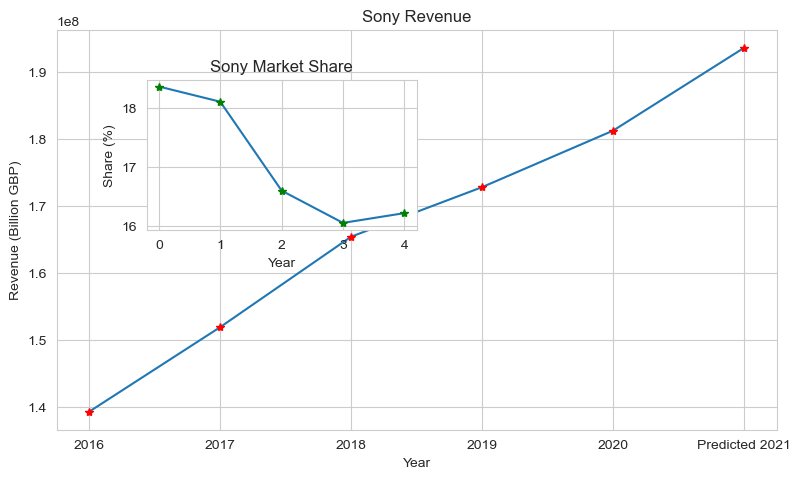

In [185]:
#Comparing Annual Revenue and Market Share of Sony from year 2016-2020

x1 = df.loc['Sony']
x2 = ms_df['Sony']

fig = plt.figure(figsize=(9,5), dpi=100)
axes1 = fig.add_axes([0.1,0.1,0.8,0.8])
plt.xlabel('Year')
plt.ylabel('Revenue (Billion GBP)')

axes2 = fig.add_axes([0.2,0.5,0.3,0.3])
plt.xlabel('Year')
plt.ylabel('Share (%)')

axes1.plot(x1, marker='*', markerfacecolor='red', markeredgecolor='red')
axes2.plot(x2, marker='*', markerfacecolor='green', markeredgecolor='green')

axes1.set_title('Sony Revenue')
axes2.set_title('Sony Market Share')

Text(0.5, 1.0, 'Industry Total')

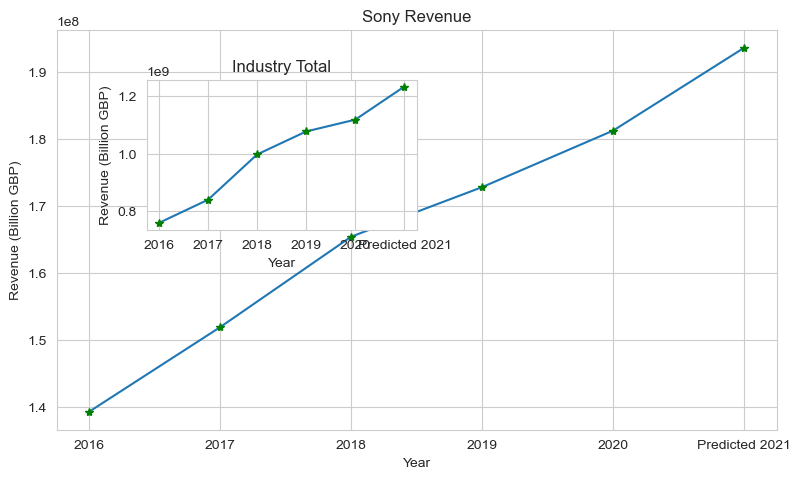

In [186]:
#Comparing Annual Revenue of Sony and Recorded Music Industry Total Revenue from year 2016-2020

x1 = df.loc['Sony']
x2 = df.loc['Industry Total']

fig = plt.figure(figsize=(9,5), dpi=100)
axes1 = fig.add_axes([0.1,0.1,0.8,0.8])
plt.xlabel('Year')
plt.ylabel('Revenue (Billion GBP)')

axes2 = fig.add_axes([0.2,0.5,0.3,0.3])
plt.xlabel('Year')
plt.ylabel('Revenue (Billion GBP)')

axes1.plot(x1, marker='*', markerfacecolor='green', markeredgecolor='green')
axes2.plot(x2, marker='*', markerfacecolor='green', markeredgecolor='green')

axes1.set_title('Sony Revenue')
axes2.set_title('Industry Total')

Text(0.5, 1.0, 'Beggars UK')

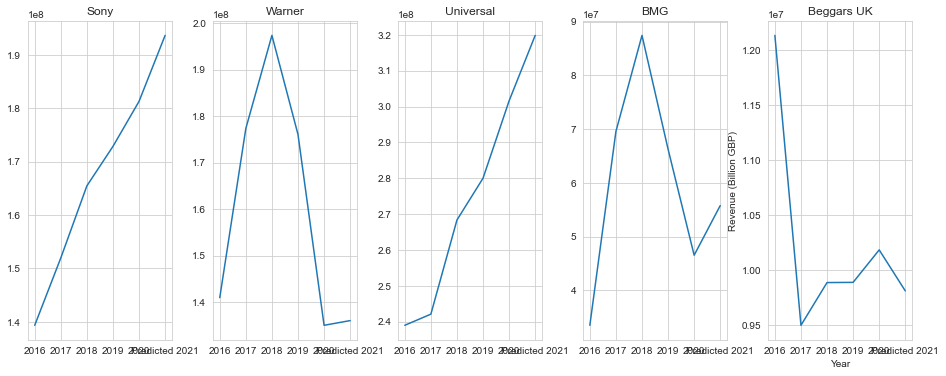

In [187]:
#Comparing Annual Revenue (billion GBP) of Big 4 from year 2016-2020

fig,axes = plt.subplots(nrows=1, ncols=5, figsize=(13,5))
plt.tight_layout()

plt.xlabel('Year')
plt.ylabel('Revenue (Billion GBP)')

axes[0].plot(df.loc['Sony'])
axes[0].set_title('Sony')

axes[1].plot(df.loc['Warner'])
axes[1].set_title('Warner')

axes[2].plot(df.loc['Universal'])
axes[2].set_title('Universal')

axes[3].plot(df.loc['BMG'])
axes[3].set_title('BMG')

axes[4].plot(df.loc['Beggars UK'])
axes[4].set_title('Beggars UK')

Text(692.3310344827587, 0.5, 'Share (%)')

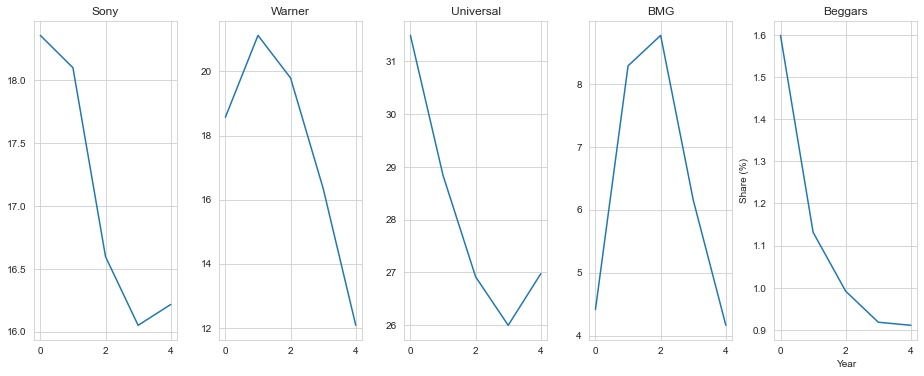

In [188]:
#Comparing Market Share of Big 4 from year 2016-2020
fig,axes = plt.subplots(nrows=1, ncols=5, figsize=(13,5))
plt.tight_layout()

axes[0].plot(ms_df['Sony'])
axes[0].set_title('Sony')

axes[1].plot(ms_df['Warner'])
axes[1].set_title('Warner')

axes[2].plot(ms_df['Universal'])
axes[2].set_title('Universal')

axes[3].plot(ms_df['BMG'])
axes[3].set_title('BMG')


axes[4].plot(ms_df['Beggars'])
axes[4].set_title('Beggars')

plt.xlabel('Year')
plt.ylabel('Share (%)')


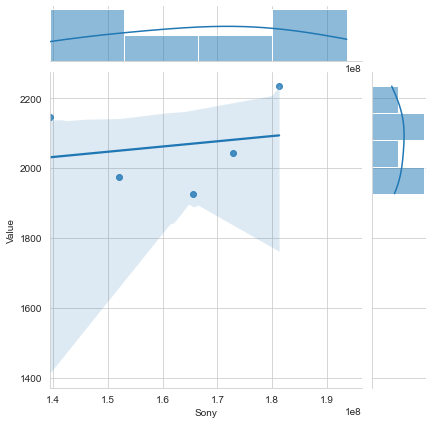

In [189]:
sns.jointplot(x=df.loc['Sony'], y=HHI_df['Value'], kind='reg')
#there are positive relationship between Sony's increase in revenue(indicating that its growing) and HHI value
#This means, if Sony grows even larger after the merger HHI is expected to increase even more

<AxesSubplot:xlabel='Year'>

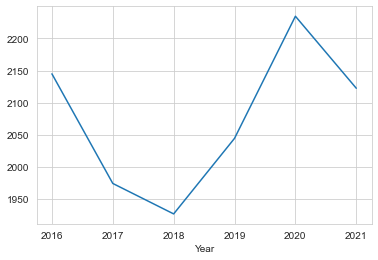

In [190]:
HHI_df['Value'].plot()

<AxesSubplot:>

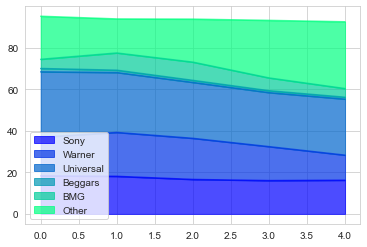

In [84]:
ms_df.plot.area(alpha=0.7, cmap='winter')
#you can see that the 3 firms covers more than half of the whole market

In [96]:
df.drop('2015', axis=1, inplace=True)

In [98]:
sony_rr = df.loc['Sony']

In [99]:
warner_rr = df.loc['Warner']

In [100]:
universal_rr = df.loc['Universal']

In [101]:
kobalt_rr = df.loc['Kobalt']

In [102]:
beggars_rr = df.loc['Beggars UK']

In [103]:
BMG_rr = df.loc['BMG']

In [104]:
domino_rr = df.loc['Domino']

In [105]:
ninja_rr = df.loc['Ninja Tune']

In [106]:
ins_rr = df.loc['Industry Total']

In [153]:
awal_rr = df.loc['AWAL']

In [107]:
indus = df.loc['Industry Total']
indus

2016     759000000
2017     839500000
2018     997000000
2019    1077000000
2020    1118000000
Name: Industry Total, dtype: int64

In [154]:
index = {'Year': ['2016', '2017', '2018', '2019', '2020'], 'Sony': sony_rr, 'Warner': warner_rr, 'Universal': universal_rr, 'Kobalt': kobalt_rr, 'Beggars': beggars_rr, 'BMG': BMG_rr, 'Domino': domino_rr, 'Ninja Tune': ninja_rr, 'AWAL': awal_rr, 'Indus Rev': ins_rr}
Revdf = pd.DataFrame(index)

In [155]:
Revdf

,Year,Sony,Warner,Universal,Kobalt,Beggars,BMG,Domino,Ninja Tune,AWAL,Indus Rev
2016,2016,139336000,140960000,238988000,33395000,12134385,33501000,3306390,0,3187000,759000000
2017,2017,151954000,177358000,242102000,45894000,9500669,69559000,2999670,2546200,10657000,839500000
2018,2018,165459000,197373000,268355000,52587000,9888950,87428000,6301950,3140160,12533000,997000000
2019,2019,172856000,176068000,280007000,65437000,9890777,66267000,4028000,4015130,29127000,1077000000
2020,2020,181290000,135017000,301591000,75247000,10185737,46538000,4221000,4358400,30687000,1118000000


In [134]:
Revdf.dtypes

Year          object
Sony           int64
Warner         int64
Universal      int64
Kobalt         int64
Beggars        int64
BMG            int64
Domino         int64
Ninja Tune     int64
Indus Rev      int64
dtype: object

In [157]:
Revdf['Year'] = pd.to_numeric(Revdf['Year'])

In [158]:
perc_chang = Revdf.pct_change(axis=0)

In [159]:
perc_chang
perc_df = pd.DataFrame(perc_chang)

In [160]:
perc_df
#Average percentage change of each company:
#Sony: 6.823%
#Warnewr: 0.7492%
#Universal: 6.049%
#Kobalt: 22.8596%
#Beggars: -3.654%
#BMG: 19.836%
#Domino: 17.3799%
#Ninja Tune: 19.91%
#AWAL: 103.5746%
#Total Industry: 10.2995%

,Year,Sony,Warner,Universal,Kobalt,Beggars,BMG,Domino,Ninja Tune,AWAL,Indus Rev
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,0.000496,0.090558,0.258215,0.013030,0.374278,-0.217046,1.076326,-0.092766,inf,2.343897,0.106061
2018,0.000496,0.088876,0.112851,0.108438,0.145836,0.040869,0.256890,1.100881,0.233273,0.176035,0.187612
2019,0.000496,0.044706,-0.107943,0.043420,0.244357,0.000185,-0.242039,-0.360833,0.278639,1.324025,0.080241
2020,0.000495,0.048792,-0.233154,0.077084,0.149915,0.029822,-0.297720,0.047915,0.085494,0.053559,0.038069


In [144]:
(perc_df['Sony'].mean())*100

6.823291339410203

In [145]:
(perc_df['Warner'].mean())*100

0.7492218903420444

In [146]:
(perc_df['Universal'].mean())*100

6.04928981328271

In [147]:
(perc_df['Kobalt'].mean())*100

22.85964498545516

In [148]:
(perc_df['Beggars'].mean())*100

-3.654260330870587

In [149]:
(perc_df['BMG'].mean())*100

19.836423007741566

In [150]:
(perc_df['Domino'].mean())*100

17.379927761211157

In [151]:
(perc_df['Ninja Tune'].mean())*100
#19.91%

inf

In [161]:
(perc_df['AWAL'].mean())*100
#dont include 2016 103.5746

97.43786855574768

In [152]:
(perc_df['Indus Rev'].mean())*100

10.299542780506354

In [167]:
df['Predicted 2021'] = [193653978, 319834843, 136028547, 92448163, 9813550, 1233148410, 4989365, 5226157, 62470937, 55769277, 352913593]

In [166]:
1233148410 - (193653978 + 319834843 + 136028547 + 92448163 + 9813550 + 4989365 + 5226157 + 55769277 + 62470937)

352913593

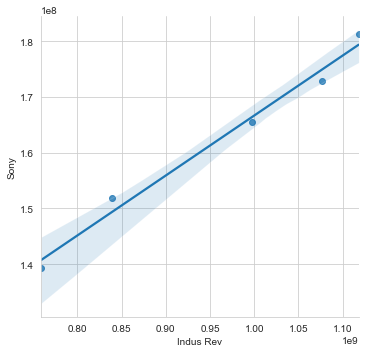

In [114]:
sns.lmplot(x='Indus Rev', y='Sony', data=Revdf)

In [ ]:
#CR4 Calculation
#Revenue for each companies.
#Number of firms: 5 firms (those that have >5% marketshare) 
#Pre (Sony, Warner, UMG, BMG, Beggars) 
#Post (Sony(Plus AWAL and KNR), Warner, UMG, BMG, Beggars) 
#Number of years: 5 years (2015-2020) 

In [ ]:
#pre merger

In [124]:
CR5_20 = (((df['2020'][0])+(df['2020'][1])+(df['2020'][2])+(df['2020'][4])+(df['2020'][-2]))/(df.loc['Industry Total'][-1]))*100
CR5_20

60.34183694096601

In [125]:
CR5_19 = (((df['2019'][0])+(df['2019'][1])+(df['2019'][2])+(df['2019'][4])+(df['2019'][-2]))/(df.loc['Industry Total'][-2]))*100
CR5_19

65.4678530176416

In [126]:
CR5_18 = (((df['2018'][0])+(df['2018'][1])+(df['2018'][2])+(df['2018'][4])+(df['2018'][-2]))/(df.loc['Industry Total'][-3]))*100
CR5_18

73.0696038114343

In [127]:
CR5_17 = (((df['2017'][0])+(df['2017'][1])+(df['2017'][2])+(df['2017'][4])+(df['2017'][-2]))/(df.loc['Industry Total'][-4]))*100
CR5_17

77.48346265634306

In [128]:
CR5_16 = (((df['2016'][0])+(df['2016'][1])+(df['2016'][2])+(df['2016'][4])+(df['2016'][-2]))/(df.loc['Industry Total'][-5]))*100
CR5_16

74.42943148880106

In [179]:
CR5_21 = (((df['Predicted 2021'][0])+(df['Predicted 2021'][-3])+(df['Predicted 2021'][1])+(df['Predicted 2021'][2])+(df['Predicted 2021'][4])+(df['Predicted 2021'][-2]))/(df.loc['Industry Total'][-1]))*100
CR5_21

63.05576244468417

In [181]:
CR5_index = {'Year': ['2016', '2017', '2018', '2019', '2020', '2021'], 'CR5 Value': [CR5_16, CR5_17, CR5_18, CR5_19, CR5_20, CR5_21]}
CR5_df = pd.DataFrame(CR5_index)
CR5_df.set_index('Year', inplace=True)

In [182]:
CR5_df

,CR5 Value
Year,
2016,74.429431
2017,77.483463
2018,73.069604
2019,65.467853
2020,60.341837
2021,63.055762


<AxesSubplot:xlabel='Year'>

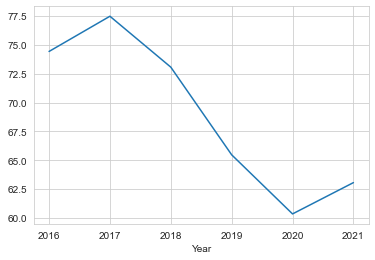

In [183]:
CR5_df['CR5 Value'].plot()